# Tensorflow tutorials - inspired by http://learningtensorflow.com/lesson7/

### Working with loops

In [2]:
# Create a loop to increment the values
import tensorflow as tf
import numpy as np

x = tf.Variable(5.0, name="x")

model = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(model)
    for i in range(5):
        x += 1.0
        print(sess.run(x))

6.0
7.0
8.0
9.0
10.0


In [4]:
# we can use the loop but with a condition in the loop as a breaking point

x = tf.Variable(5.0, name="x")
threshold = tf.Variable(10.0, name="thres")

model = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(model)
    while sess.run(tf.less_equal(x, threshold)):
        x += 1.0
        print(sess.run(x))

6.0
7.0
8.0
9.0
10.0
11.0


## Very simple Gradient Descent Optimization on a Linear Regression variable to learn the values

In [15]:
import tensorflow as tf
import numpy as np

# define 2 placeholder variables x and y
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y")

# this is our weight matrix which will be modified as per miniming our loss
w = tf.Variable([1.0, 2.0], name="w")

y_ = x*w[0] + w[1]

# this is our loss or error function
loss_error = (y-y_)**2

# this is doing all the magic to call the GradientDescentOptimizer or various other Optimizers
# this has a specific learning rate, and minimizes the loss function.
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss_error)


In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        # Randomly generate the X_sample and the y_sample values and call the train_op value
        X_sample = np.random.randn()
        Y_sample = 2*X_sample + 3
        sess.run(train_op, feed_dict = {x: X_sample, y: Y_sample})
    
    # After the training is done, or 1000 ietarations are done print values of w , to see how close they are
    #print("The final value of w is %.3f * x + %.3f  " % (w[0], w[1]))
    print(sess.run([w[0], w[1]]))

[1.9999995, 2.9999962]


## Plotting the Error function after calling the train function

[2.0, 2.9999976]


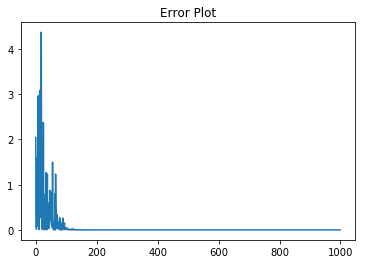

In [18]:
errors = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        # Randomly generate the X_sample and the y_sample values and call the train_op value
        X_sample = np.random.randn()
        Y_sample = 2*X_sample + 3
        _, err = sess.run([train_op,loss_error], feed_dict = {x: X_sample, y: Y_sample})
        errors.append(err)
    
    # After the training is done, or 1000 ietarations are done print values of w , to see how close they are
    #print("The final value of w is %.3f * x + %.3f  " % (w[0], w[1]))
    print(sess.run([w[0], w[1]]))
    
    #Plot the errors now without doing any normalizing
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(errors)
    plt.title("Error Plot")
    plt.show()

[2.0, 2.9999971]


/Users/tkmacl9/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tkmacl9/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


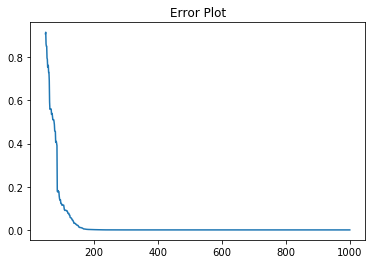

In [21]:
# repeating the same process with normalized values of errors
errors = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        # Randomly generate the X_sample and the y_sample values and call the train_op value
        X_sample = np.random.randn()
        Y_sample = 2*X_sample + 3
        _, err = sess.run([train_op,loss_error], feed_dict = {x: X_sample, y: Y_sample})
        errors.append(err)
    
    # After the training is done, or 1000 ietarations are done print values of w , to see how close they are
    #print("The final value of w is %.3f * x + %.3f  " % (w[0], w[1]))
    print(sess.run([w[0], w[1]]))
    
    #Plot the errors now without doing any normalizing
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
    plt.title("Error Plot")
    plt.show()